In [29]:
using SymbolicNumericIntegration
using Symbolics
using Latexify
using BenchmarkTools
include("RBFunctions.jl")
using Plots
using LinearAlgebra
using IterativeSolvers
using DoubleFloats

In [30]:
@variables x y;
dx(exprs) = simplify(expand_derivatives(Differential(x)(exprs)))
dy(exprs) = simplify(expand_derivatives(Differential(y)(exprs)))
u = -y*sin(x^2 + y^2)
v = x*sin(x^2 + y^2)
p = sin(x-y)
f1 = -dx(dx(u)) - dy(dy(u)) + dx(p)
f2 = -dx(dx(v)) - dy(dy(v)) + dy(p)
display(f1)
display(f2)
f1 = eval(build_function(f1,x,y))
f2 = eval(build_function(f2,x,y))
true_v1 = eval(build_function(u,x,y))
true_v2 = eval(build_function(v,x,y))

8y*cos(x^2 + y^2) + cos(x - y) - 4(y^3)*sin(x^2 + y^2) - 4y*(x^2)*sin(x^2 + y^2)

4(x^3)*sin(x^2 + y^2) + 4x*(y^2)*sin(x^2 + y^2) - cos(x - y) - 8x*cos(x^2 + y^2)

#1254 (generic function with 1 method)

In [31]:
D = ones(Num,(6,6))
Z = zeros(Num,(6,6))
Z[1,1] = x^(5//2)
Z[2,2] = x^(5//2)
Z[3,3] = x^(1//2)
Z[4,4] = x^(1//2)
Z[5,5] = x^(5//2)
Z[6,6] = x^(5//2)
Z*D*Z

6×6 Matrix{Num}:
 x^(5//1)  x^(5//1)  x^(3//1)  x^(3//1)  x^(5//1)  x^(5//1)
 x^(5//1)  x^(5//1)  x^(3//1)  x^(3//1)  x^(5//1)  x^(5//1)
 x^(3//1)  x^(3//1)         x         x  x^(3//1)  x^(3//1)
 x^(3//1)  x^(3//1)         x         x  x^(3//1)  x^(3//1)
 x^(5//1)  x^(5//1)  x^(3//1)  x^(3//1)  x^(5//1)  x^(5//1)
 x^(5//1)  x^(5//1)  x^(3//1)  x^(3//1)  x^(5//1)  x^(5//1)

In [32]:
@variables ϵ r x₁ x₂ ;
μ = 1.0
ρ = 1.0
#ϕ2 = exp(-r^2*ϵ^2)
#ϕ = (1.0-r*ϵ)^8 * (32.0*(r*ϵ)^3 + 25.0* (r*ϵ)^2 + 8.0*r*ϵ + 1.0)
#ϕ = (1-r*ϵ)^10 * (429*(r*ϵ)^4 + 450*(r*ϵ)^3 + 210*(r*ϵ)^2 + 50*(r*ϵ)+5)
ϕ = r^7
ϕ2 =r^3
#ϕ = (1-r*ϵ)^4 * (4r*ϵ+1)
ϕ = substitute(ϕ, r=>sqrt(x₁^2 + x₂^2)) 
#ϕ = substitute(ϕ, r=>sqrt(x₁^2 + x₂^2))
ϕ = simplify(ϕ,expand = true)
display(ϕ)  
#Δ(exprs) = expand_derivatives((Differential(x₁)^2)(exprs) + (Differential(x₂)^2)(exprs))
#∂₁(exprs) = simplify(expand_derivatives(Differential(x₁)(exprs)) + expand_derivatives(Differential(r)(exprs)) * (x₁/r),expand = true)
#∂₂(exprs) = simplify(expand_derivatives(Differential(x₂)(exprs)) + expand_derivatives(Differential(r)(exprs)) * (x₂/r),expand = true)
∂₁(exprs) = simplify(expand_derivatives(Differential(x₁)(exprs)))
∂₂(exprs) = simplify(expand_derivatives(Differential(x₂)(exprs)))
Δ(exprs) = ∂₁(∂₁(exprs)) + ∂₂(∂₂(exprs))


Φ_div = ([-∂₂(∂₂(ϕ)) ∂₁(∂₂(ϕ)) 0; ∂₁(∂₂(ϕ)) -∂₁(∂₁(ϕ)) 0; 0 0 ϕ2])
Φ_div = substitute.(Φ_div,r=>sqrt(x₁^2 + x₂^2))


λu(x) = x[1]
λv(x) = x[2]
λp(x) = x[3]

λ1y(x) = -(μ/ρ)*Δ(x[1]) -  (1/ρ)*∂₁(x[3]) #- ∂₁(x[1]) - ∂₂(x[1])
λ2y(x) = -(μ/ρ)*Δ(x[2]) -  (1/ρ)*∂₂(x[3]) #- ∂₁(x[2]) - ∂₂(x[2])
λ3y(x) = x[1]
λ4y(x) = x[2]

λ1x(x) = -(μ/ρ)*Δ(x[1]) + (1/ρ)*∂₁(x[3]) #+ ∂₁(x[1]) + ∂₂(x[1])
λ2x(x) = -(μ/ρ)*Δ(x[2]) +  (1/ρ)*∂₂(x[3]) #+ ∂₁(x[2]) + ∂₂(x[2])
λ3x(x) = x[1]
λ4x(x) = x[2]

display(Φ_div)



sqrt(x₁^2 + x₂^2)^7

3×3 Matrix{Num}:
 (-7//1)*(sqrt(x₁^2 + x₂^2)^5) - (35//1)*(x₂^2)*(sqrt(x₁^2 + x₂^2)^3)  …                    0
                                  (35//1)*x₁*x₂*(sqrt(x₁^2 + x₂^2)^3)                       0
                                                                    0     sqrt(x₁^2 + x₂^2)^3

In [33]:
K = construct_kernel_array(Φ_div,[λ1x,λ2x,λ3x,λ4x],[λ1y,λ2y,λ3y,λ4y])
display(K)
#K = substitute.(K, sqrt(x₁^2+x₂^2) => r)
#K = substitute.(K, (Dict([x₁ => r, x₂ =>r]),))
#display(K)
K = compile_kernel_array(K)

KE = construct_kernel_array(Φ_div,[λu,λv,λp],[λ1y,λ2y,λ3y,λ4y])
#display(KE)
KE = compile_kernel_array(KE)

P_list2D = generate_2D2_div_free_poly_basis(3)
P_list1D = generate_2D1_poly_basis(2)

#println(K[1,1]([1e-40,1e-40],1.0))

P_list = []
for p2 in P_list2D
    append!(P_list, [vcat(p2,Num(0.0))])
end

#append!(P_list, [vcat(Num(0),Num(0),Num(1))])
for p1 in P_list1D[2:end]
    append!(P_list, [vcat(Num(0.0),Num(0.0),p1)])
end

#display(P_list)
F_P = apply_functionals_to_polynomials([λ1x,λ2x,λ3x,λ4x],P_list)
display(F_P)
F_P = compile_polynomials(F_P)

F_PE = apply_functionals_to_polynomials([λu,λv,λp],P_list)
display(F_PE)
F_PE = compile_polynomials(F_PE)

N_poly = size(F_P)[2]


#display(P_list2D)

#display(substitute.(K, x₁=>r ))

4×4 Matrix{Num}:
  105.0(x₁^4)*(sqrt(x₁^2 + x₂^2)^-3) + 1785.0(x₂^4)*(sqrt(x₁^2 + x₂^2)^-3) + 1890.0(x₁^2)*(x₂^2)*(sqrt(x₁^2 + x₂^2)^-3) - 2523.0sqrt(x₁^2 + x₂^2) - 315.0(x₂^6)*(sqrt(x₁^2 + x₂^2)^-5) - 1263.0(x₁^2)*(sqrt(x₁^2 + x₂^2)^-1) - 6300.0(x₂^2)*(sqrt(x₁^2 + x₂^2)^-1) - 315.0(x₁^4)*(x₂^2)*(sqrt(x₁^2 + x₂^2)^-5) - 630.0(x₁^2)*(x₂^4)*(sqrt(x₁^2 + x₂^2)^-5)  …                                                                  -105.0x₁*(x₂^3)*(sqrt(x₁^2 + x₂^2)^-1) - 630.0x₁*x₂*sqrt(x₁^2 + x₂^2) - 105.0x₂*(x₁^3)*(sqrt(x₁^2 + x₂^2)^-1)
  315.0x₁*(x₂^5)*(sqrt(x₁^2 + x₂^2)^-5) + 315.0x₂*(x₁^5)*(sqrt(x₁^2 + x₂^2)^-5) + 5037.0x₁*x₂*(sqrt(x₁^2 + x₂^2)^-1) + 630.0(x₁^3)*(x₂^3)*(sqrt(x₁^2 + x₂^2)^-5) - 1680.0x₂*(x₁^3)*(sqrt(x₁^2 + x₂^2)^-3) - 1680.0x₁*(x₂^3)*(sqrt(x₁^2 + x₂^2)^-3)                                                                                                                                                                              140.0(sqrt(x₁^2 + x₂^2)^3) + 105.0(x₁^4)*(

4×19 Matrix{Num}:
 0.0   0.0    0.0    -2.0               0.0  …  0.0  1.0    0.0  x₂    2x₁
 0.0   0.0    0.0     0.0               1.0     1.0  0.0  2x₂    x₁      0.0
 1    x₂     x₁    x₂^2             x₁*x₂       0.0  0.0    0.0   0.0    0.0
 0.0   0.0  -x₂       0.0  (-1//2)*(x₂^2)       0.0  0.0    0.0   0.0    0.0

3×19 Matrix{Num}:
 1    x₂     x₁    x₂^2    …   0.0   0.0     0.0      0.0     0.0
 0.0   0.0  -x₂       0.0      0.0   0.0     0.0      0.0     0.0
 0.0   0.0    0.0     0.0     x₂    x₁    x₂^2    x₁*x₂    x₁^2

19

done(219,)

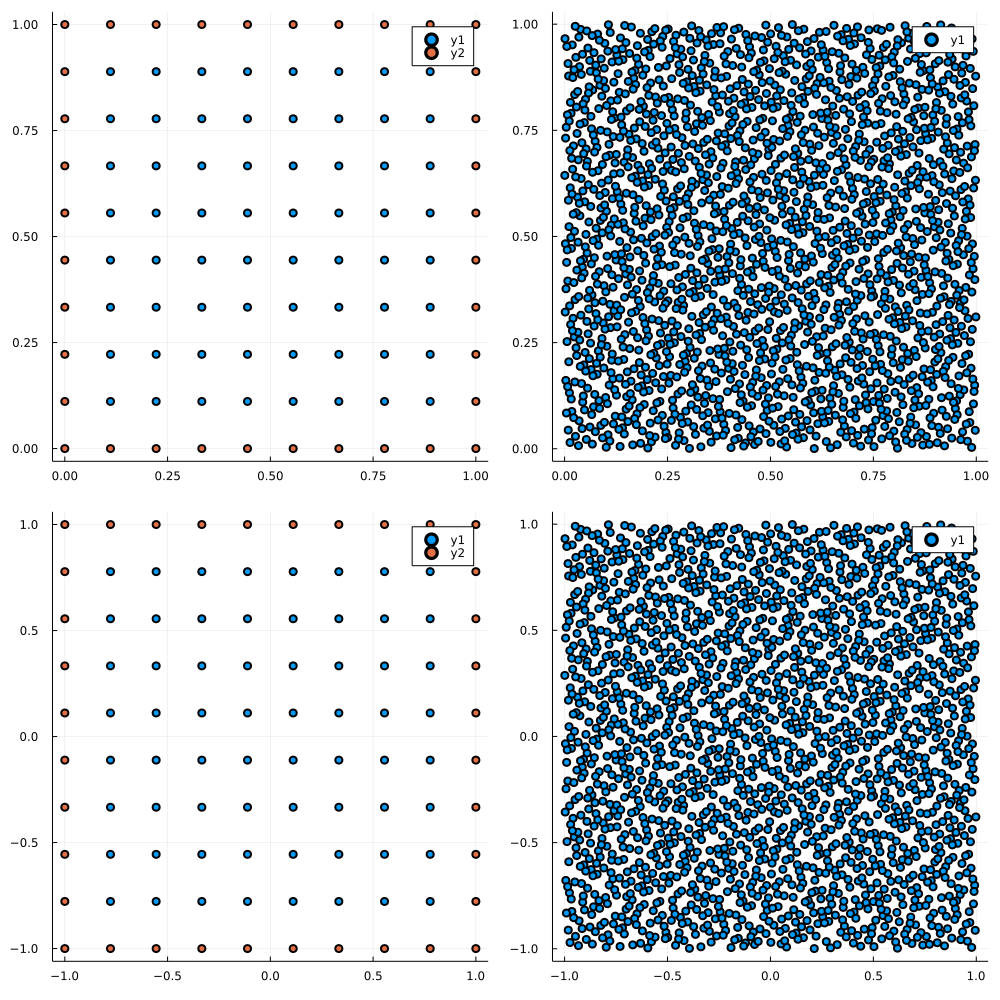

In [34]:
scale = 2
shift = 0.5
N_coll = 10
N_test = 2000
I_points,B_points = generate_2D_equally_spaced_points(N_coll)
All_points = hcat(I_points,B_points)
All_points = All_points
#Test_points = hcat(generate_2D_equally_spaced_points(117)...)
Test_points = generate_2D_Halton_points(N_test)
N_tot = size(All_points)[2]

I_points2 = scale*(I_points .- shift)
B_points2 = scale*(B_points .- shift)
Test_points2  = scale*(Test_points .- shift)


f = vcat(f1.(I_points[1,:],I_points[2,:]),f2.(I_points[1,:],I_points[2,:]))
b = vcat(true_v1.(B_points[1,:],B_points[2,:]),true_v2.(B_points[1,:],B_points[2,:]))
b = vcat(f,b,zeros(N_poly))

reference_v = vcat(true_v1.(Test_points[1,:],Test_points[2,:]),true_v2.(Test_points[1,:],Test_points[2,:]))
print("done",size(b))

l = @layout [a b; c d]
p1 = scatter(I_points[1,:], I_points[2,:])
p1 = scatter!(B_points[1,:], B_points[2,:])

p2 = scatter(Test_points[1,:], Test_points[2,:])

p3 = scatter(I_points2[1,:], I_points2[2,:])
p3 = scatter!(B_points2[1,:], B_points2[2,:])

p4 = scatter(Test_points2[1,:], Test_points2[2,:])

plot(p1, p2, p3, p4 ,layout = l,size = (1000,1000))

In [35]:
function batch_solve(n_lst,K,KE,F_P,F_PE)
    Test_points = generate_2D_Halton_points(N_test)
    N_poly = size(F_P)[2]
    error_lst = []

    for n in n_lst
        I_points,B_points = generate_2D_equally_spaced_points(n)
        f = vcat(f1.(I_points[1,:],I_points[2,:]),f2.(I_points[1,:],I_points[2,:]))
        b = vcat(true_v1.(B_points[1,:],B_points[2,:]),true_v2.(B_points[1,:],B_points[2,:]))
        b = vcat(f,b,zeros(N_poly))
        reference_v = vcat(true_v1.(Test_points[1,:],Test_points[2,:]),true_v2.(Test_points[1,:],Test_points[2,:]))

        A = crete_block_point_tensors([I_points,I_points,B_points,B_points],[I_points,I_points,B_points,B_points])
        A = generate_block_matrices(K,A,param)
        A = flatten(A)
        E = crete_block_point_tensors([Test_points,Test_points,Test_points],[I_points,I_points,B_points,B_points])
        E = generate_block_matrices(KE,E,param)
        E = flatten(E)
        O = zeros(N_poly,N_poly)
        P = generate_P_matrix([I_points,I_points,B_points,B_points],F_P)
        PE = generate_P_matrix([Test_points,Test_points,Test_points],F_PE)
        M = [A P;P' O]
        Q = [E PE]

        println("cond A: ",cond(A))
        println("cond M: ",cond(M))
        M = Double64.(M)
        b = Double64.(b)

        c = M\b
        sol = Q*c
        sol = Float64.(sol)
        error = abs.(reference_v - sol[1:2*N_test])
        RMS = sqrt(sum(error .^2)/(2*N_test))
        append!(error_lst,[RMS])
    end
    return error_lst
end

batch_solve (generic function with 1 method)

In [36]:
param = 1/2
A = crete_block_point_tensors([I_points,I_points,B_points,B_points],[I_points,I_points,B_points,B_points])
A = generate_block_matrices(K,A,param)
A = flatten(A)

E = crete_block_point_tensors([Test_points,Test_points,Test_points],[I_points,I_points,B_points,B_points])
E = generate_block_matrices(KE,E,param)
E = flatten(E)
#display(E)

O = zeros(N_poly,N_poly)
P = generate_P_matrix([I_points,I_points,B_points,B_points],F_P)
PE = generate_P_matrix([Test_points,Test_points,Test_points],F_PE)
M = [A P
    P' O]

Q = [E PE]

println("cond A: ",cond(A))
println("cond M: ",cond(M))
#display(M)
#display(Q)

A2 = crete_block_point_tensors([I_points2,I_points2,B_points2,B_points2],[I_points2,I_points2,B_points2,B_points2])
A2 = generate_block_matrices(K,A2,param)
A2 = flatten(A2)

E2 = crete_block_point_tensors([Test_points2,Test_points2,Test_points2],[I_points2,I_points2,B_points2,B_points2])
E2 = generate_block_matrices(KE,E2,param)
E2 = flatten(E2)
P2 = generate_P_matrix([I_points2,I_points2,B_points2,B_points2],F_P)
PE2 = generate_P_matrix([Test_points2,Test_points2,Test_points2],F_PE)
M2 = [A2 P2
    P2' O]

Q2 = [E2 PE2]


println("cond A2: ",cond(A2))
println("cond M2: ",cond(M2))
display(A[1:10,1:10])
display(A2[1:10,1:10])

cond A: 9.225097452901365e9
cond M: 8.736666156992073e9
cond A2: 6.271782860070446e8
cond M2: 1.0213384948800932e9


10×10 Matrix{Float64}:
    -7.80222e-27   -817.0          …   -409.0           -866.913
  -817.0             -7.80222e-27      -866.913         -409.0
 -1634.0           -817.0             -1644.4           -866.913
 -2451.0          -1634.0             -2454.56         -1644.4
 -3268.0          -2451.0             -3269.62         -2454.56
 -4085.0          -3268.0          …  -4085.88         -3269.62
 -4902.0          -4085.0             -4902.54         -4085.88
 -5719.0          -4902.0             -5719.36         -4902.54
  -409.0           -866.913              -7.80222e-27   -817.0
  -866.913         -409.0              -817.0             -7.80222e-27

10×10 Matrix{Float64}:
     -7.80222e-27  -1634.0          …    -818.0          -1733.83
  -1634.0             -7.80222e-27      -1733.83          -818.0
  -3268.0          -1634.0              -3288.81         -1733.83
  -4902.0          -3268.0              -4909.12         -3288.81
  -6536.0          -4902.0              -6539.25         -4909.12
  -8170.0          -6536.0          …   -8171.77         -6539.25
  -9804.0          -8170.0              -9805.08         -8171.77
 -11438.0          -9804.0             -11438.7          -9805.08
   -818.0          -1733.83                -7.80222e-27  -1634.0
  -1733.83          -818.0              -1634.0             -7.80222e-27

In [37]:
#M = Double64.(M)
#Q = Double64.(Q)
c = M\b
sol = Float64.(Q*c)

#c = A\b[1:end-N_poly]
#sol = E*c

c2 = M2\b
sol2 = Float64.(Q2*c2)

#c2 = A2\b[1:end-N_poly]
#sol2 = E2*c2

error = abs.(reference_v - sol[1:2*N_test])
RMS = sqrt(sum(error .^2)/(2*N_test))
println("rms: ",RMS)
display((abs.((c2-c))))
display(sum(abs.((sol2-sol)[1:2*N_test]))/(2*N_test))
#surface(Test_points[1,:],Test_points[2,:],error[1:N_test])
#scatter(Test_points[1,:], Test_points[2,:], zcolor=error[1:N_test],markerstrokewidth = 0,markerstrokestyle  = :rect )
#scatter(Test_points[1,:], Test_points[2,:], zcolor=reference_v[1+N_test:end],markerstrokewidth = 0,markerstrokestyle  = :rect )
#scatter(Test_points[1,:], Test_points[2,:], zcolor=sol[1+N_test:end],markerstrokewidth = 0,markerstrokestyle  = :rect )
l = @layout [a b; c d; e f]
p1 = scatter(Test_points[1,:], Test_points[2,:], zcolor=reference_v[1:N_test],markerstrokewidth = 0)
p2 = scatter(Test_points[1,:], Test_points[2,:], zcolor=reference_v[1+N_test:end],markerstrokewidth = 0)
p3 = scatter(Test_points[1,:], Test_points[2,:], zcolor=sol[1:N_test],markerstrokewidth = 0)
p4 = scatter(Test_points[1,:], Test_points[2,:], zcolor=sol[1+N_test:end],markerstrokewidth = 0)
p5 = scatter(Test_points[1,:], Test_points[2,:], zcolor=error[1:N_test],markerstrokewidth = 0)
p6 = scatter(Test_points[1,:], Test_points[2,:], zcolor=error[1+N_test:end],markerstrokewidth = 0)
plot(p1, p2, p3, p4,p5,p6 ,layout = l,size = (1000,1000))

rms: 0.00010283041275076795


219-element Vector{Float64}:
 0.006044982814932213
 0.005499483501736799
 0.0030031488000451384
 0.0005921812651975714
 0.00119463695915759
 0.00185332239528894
 0.0009891666739028583
 0.0009938446846431252
 0.0014529084910541758
 0.0021443329167671484
 0.001450629692739441
 0.0001818027524647275
 0.0008326911878872758
 ⋮
 1.2824875567579548
 0.6638649757181848
 0.42749585228469045
 2.3655670693983786
 1.907918177799019
 0.2647716459176799
 0.4409408452890682
 1.2947737501208598
 1.2947737501393597
 0.9322901647016922
 2.3482601588550872e-12
 0.9322901647062503

0.016277351096349216

In [38]:
M*c -b

219-element Vector{Float64}:
  5.773159728050814e-15
  8.881784197001252e-15
  3.3706371027619753e-13
 -1.0302869668521453e-13
 -6.483702463810914e-14
  1.8207657603852567e-13
  2.220446049250313e-13
 -7.105427357601002e-15
 -1.2678746941219288e-13
  2.708944180085382e-14
  1.7008616737257398e-13
 -4.440892098500626e-15
  3.668176873361517e-13
  ⋮
 -6.938893903907228e-16
 -3.3306690738754696e-16
  1.1102230246251565e-15
 -2.220446049250313e-16
  0.0
  3.885780586188048e-16
  6.106226635438361e-16
 -2.9989032090949053e-16
  1.0516761073109393e-16
  8.684560255496892e-16
 -1.6609473013037922e-16
  5.569807106894016e-16

In [39]:
aaa = batch_solve([10,15,20,25,30,35,40],K,KE,F_P,F_PE)

cond A: 9.225097452901365e9
cond M: 8.736666156992073e9
cond A: 3.027801261437055e11
cond M: 2.9369373166108954e11
cond A: 3.2166510897541074e12
cond M: 3.1535897098824873e12
cond A: 1.914392033679185e13
cond M: 1.8877781174087703e13
cond A: 8.004342659803112e13
cond M: 7.921081513000617e13
cond A: 2.6394233714394444e14
cond M: 2.6180744253312388e14
cond A: 7.339566310944462e14
cond M: 7.292028573815764e14


7-element Vector{Any}:
 0.00010283041275245835
 3.514651142164092e-5
 2.7036448231160342e-5
 2.169406651018113e-5
 1.605143450410423e-5
 1.1423824928231368e-5
 8.050119410598835e-6

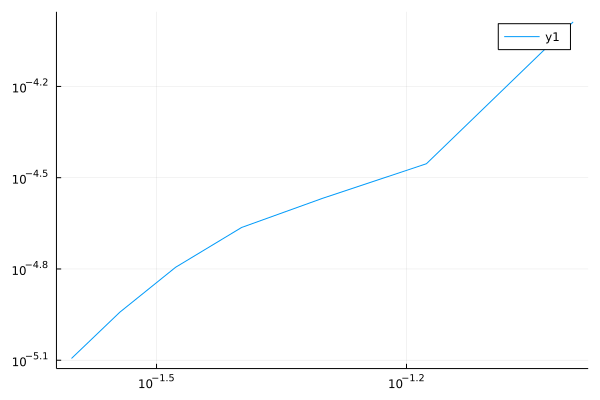

In [41]:
errR7R3P3P1 = [0.01083701445629664,0.011040613912115341,0.00852847962855357, 0.006185110581584295, 0.004483644472723684, 0.0032861939356198596, 0.0024476447268578683]
errR7R3P4P1 = [0.6003512257000744,0.6115595214891938,0.5466580059126647,0.4553585209884193,0.3644741418608427,0.2872247379379661,0.22666347617101978]
errR7R3P4P2 = [0.02712897417077472,0.04214232804255723,0.0504524529487916,0.05092690694644397,0.046882703437921856,0.041731996789498016,0.03701355732902488]

plot([10,15,20,25,30,35,40] .^ -1 ,aaa,yscale =:log10,xscale =:log10)

#batch_solve([10,15,20,25,30,35,40],K,KE,F_P,F_PE)